# Top 10 Spenders

#### Load the data and necessary libraries

In [3]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('../../dsi_team_22/data/raw/pharma.csv')

## Exploring Year Range: 2005 to 2014

### Top 10 Highest Spending Countries (Average Per Capita)

This table ranks the top 10 highest spending countries by their average spending per capita in USD.

| Rank | Country Code | Country Name     | Average Spending Per Capita ($ USD) |
|:----:|:------------:|:----------------:|:-----------------------------------:|
| 1    | USA          | United States    | 937.895500                          |
| 2    | CAN          | Canada           | 720.361100                          |
| 3    | CHE          | Switzerland      | 700.745600                          |
| 4    | GRC          | Greece           | 655.150889                          |
| 5    | JPN          | Japan            | 646.764700                          |
| 6    | IRL          | Ireland          | 635.788600                          |
| 7    | DEU          | Germany          | 627.021300                          |
| 8    | FRA          | France           | 617.524100                          |
| 9    | BEL          | Belgium          | 595.256000                          |
| 10   | LUX          | Luxembourg       | 573.441300                          |


#### Supporting Python Code:

In [4]:
# Filter the DataFrame to include only the years 2005 to 2014
df_filtered = df[(df['TIME'] >= 2005) & (df['TIME'] <= 2014)]

# Exclude the dropped countries
df_filtered = df_filtered[~df_filtered['LOCATION'].isin(['GBR', 'NZL', 'TUR', 'RUS'])]

# Identify the Top 10 highest spending countries (Per Capita)
top_10_per_cap = df_filtered.groupby('LOCATION')['USD_CAP'].mean().sort_values(ascending=False).head(10)

# Display the results
print("Top 10 Highest Spending Countries:")
print(top_10_per_cap)

Top 10 Highest Spending Countries:
LOCATION
USA    937.895500
CAN    720.361100
CHE    700.745600
GRC    655.150889
JPN    646.764700
IRL    635.788600
DEU    627.021300
FRA    617.524100
BEL    595.256000
LUX    573.441300
Name: USD_CAP, dtype: float64


## Data Visualization using Python

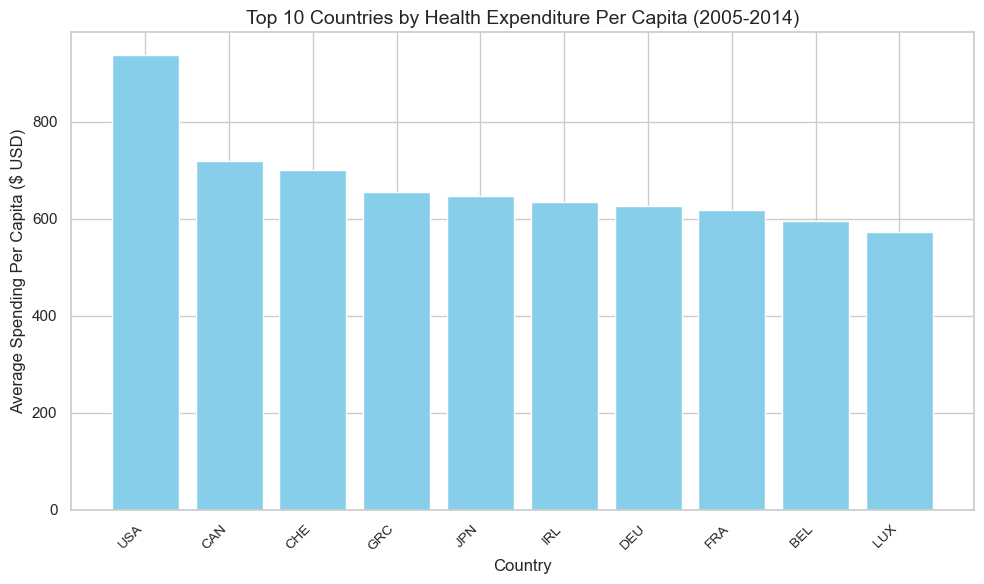

In [9]:
# Filter the DataFrame to include only the years 2005 to 2014
df_filtered = df[(df['TIME'] >= 2005) & (df['TIME'] <= 2014)]

# Exclude the dropped countries
df_filtered = df_filtered[~df_filtered['LOCATION'].isin(['GBR', 'NZL', 'TUR', 'RUS'])]

# Identify the Top 10 highest spending countries (Per Capita)
top_10_per_cap = df_filtered.groupby('LOCATION')['USD_CAP'].mean().sort_values(ascending=False).head(10)

# Plot the bar chart for top 10 spenders
plt.figure(figsize=(10, 6))
plt.bar(top_10_per_cap.index, top_10_per_cap.values, color='skyblue')
plt.title('Top 10 Countries by Health Expenditure Per Capita (2005-2014)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Spending Per Capita ($ USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()